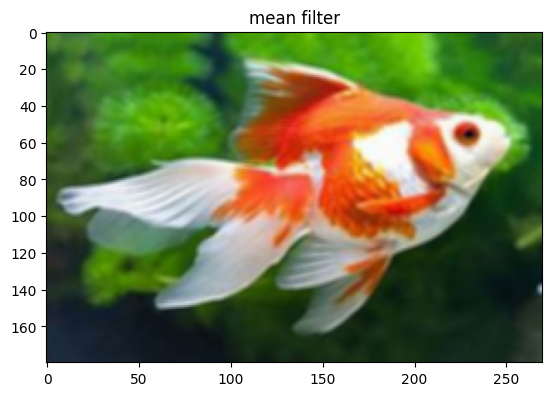

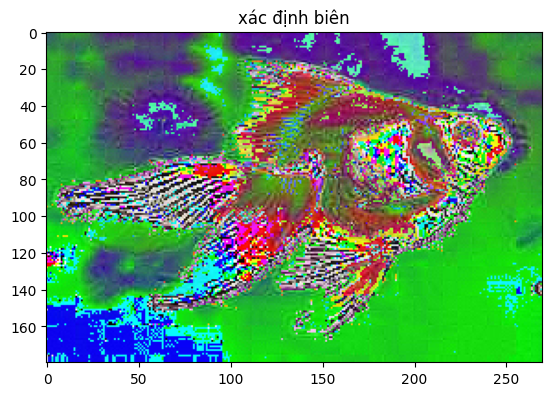

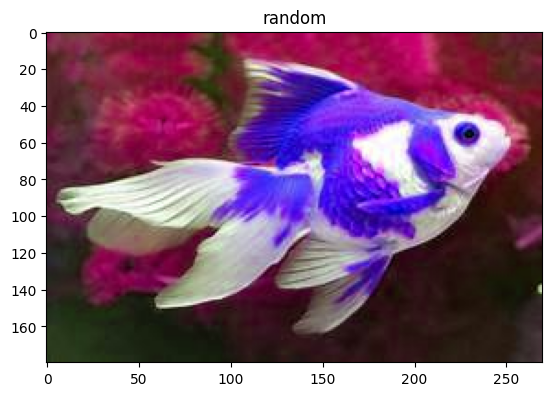

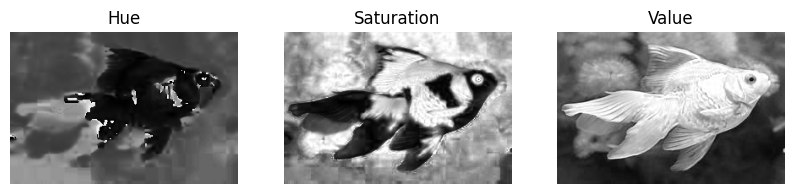

In [10]:
# bai1

import os
import imageio.v2 as iio
import numpy as np
import scipy.ndimage as sn
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage import color

img = iio.imread('a.jpg')

# Áp dụng mean filter (mặc định size=3)
if img.ndim == 3:  # Ảnh màu
    filtered_img = np.zeros_like(img)
    for c in range(3):  # Lọc từng kênh R, G, B
        filtered_img[:, :, c] = uniform_filter(img[:, :, c], size=3)
else:  # Ảnh xám
    filtered_img = uniform_filter(img, size=3)

        # Lưu ảnh
iio.imsave('a-meanfilter.jpg',filtered_img)
plt.title('mean filter')
plt.imshow(filtered_img)
plt.show()

# xác định biên
b = sn.laplace(img, mode='reflect')
plt.title('xác định biên')
plt.imshow(b)
plt.show()

#đổi màu BGR sang màu ngẫu nhiên RGB 
random = [0,1,2]
np.random.shuffle(random)

random_rgb = img[:,:,random]
iio.imwrite('a_random_color.jpg', random_rgb)
plt.title("random")
plt.imshow(random_rgb)
plt.show()

#Chuyển ảnh sang không gian màu HSV và tách riêng kênh Hue, Saturation, Value để lưu thành ba ảnh grayscale tương ứng
hsv = color.rgb2hsv(img)
hue = hsv[:, :, 0]       # từ 0 → 1
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

hue_gray = (hue * 255).astype(np.uint8)
sat_gray = (saturation * 255).astype(np.uint8)
val_gray = (value * 255).astype(np.uint8)

iio.imwrite('a_hue.jpg', hue_gray)
iio.imwrite('a_saturation.jpg', sat_gray)
iio.imwrite('a_value.jpg', val_gray)

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.imshow(hue_gray, cmap='gray')
plt.title("Hue")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sat_gray, cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(val_gray, cmap='gray')
plt.title("Value")
plt.axis('off')
plt.show()

In [14]:
# bài 2
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import random
from skimage import exposure, img_as_ubyte
from skimage import exposure, img_as_float, img_as_ubyte, color
from skimage.exposure import rescale_intensity, equalize_adapthist

image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = [iio.imread(path) for path in image_paths]

def inverse_image(img):
    return 255 - img

def gamma_correction(img):
    gamma = round(random.uniform(0.5, 2.0), 2)
    img_float = img_as_float(img)
    corrected = np.power(img_float, 1 / gamma)
    return img_as_ubyte(corrected)

def log_transform(img):
    c = round(random.uniform(1.0, 5.0), 2)
    img_float = img_as_float(img)
    log_img = np.log1p(img_float)
    log_img /= np.max(log_img)
    return img_as_ubyte(log_img)

def histogram_equalization(img):
    if len(img.shape) == 3:
        img = np.mean(img, axis=2).astype(np.uint8)  # Chuyển về ảnh xám
    return img_as_ubyte(exposure.equalize_hist(img))

def contrast_stretching(img):
    r1 = random.randint(0, 100)
    r2 = random.randint(150, 255)
    print(f">>> Stretch range: {r1} - {r2}")
    return rescale_intensity(img, in_range=(r1, r2), out_range=(0, 255)).astype(np.uint8)

def adaptive_histogram_equalization(img):
    img_gray = color.rgb2gray(img)
    img_eq = equalize_adapthist(img_gray, clip_limit=0.03, nbins=256, kernel_size=(8, 8))
    return img_as_ubyte(img_eq)

print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")
print("A - Adaptive Histogram Equalization")

choice = input("Nhập lựa chọn (I/G/L/H/C/A): ").upper()

results = []
if choice == 'I':
    result = inverse_image(img)
elif choice == 'G':
    result = gamma_correction(img)
elif choice == 'L':
    result = log_transform(img)
elif choice == 'H':
    result = histogram_equalization(img)
elif choice == 'C':
    result = contrast_stretching(img)
elif choice == 'A':
    result = adaptive_histogram_equalization(img)
else:
    print("❌ Lựa chọn không hợp lệ.")
    exit()

     
plt.figure(figsize=(12, 4))
for i, result in enumerate(results):
    plt.subplot(1, 3, i+1)
    plt.imshow(result, cmap='gray' if result.ndim == 2 else None)
    plt.title(f'image{i+1}.jpg')
    plt.axis('off')

plt.suptitle(f'Biến đổi: {choice}')
plt.tight_layout()
plt.show()



Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
A - Adaptive Histogram Equalization


<Figure size 1200x400 with 0 Axes>